In [1]:
import sys
import numpy as np
import cv2
from PIL import Image

In [2]:
src = cv2.imread('/Users/jungjihoon/Library/Mobile Documents/com~apple~CloudDocs/00_DataScience/민형기/digits_print.bmp')

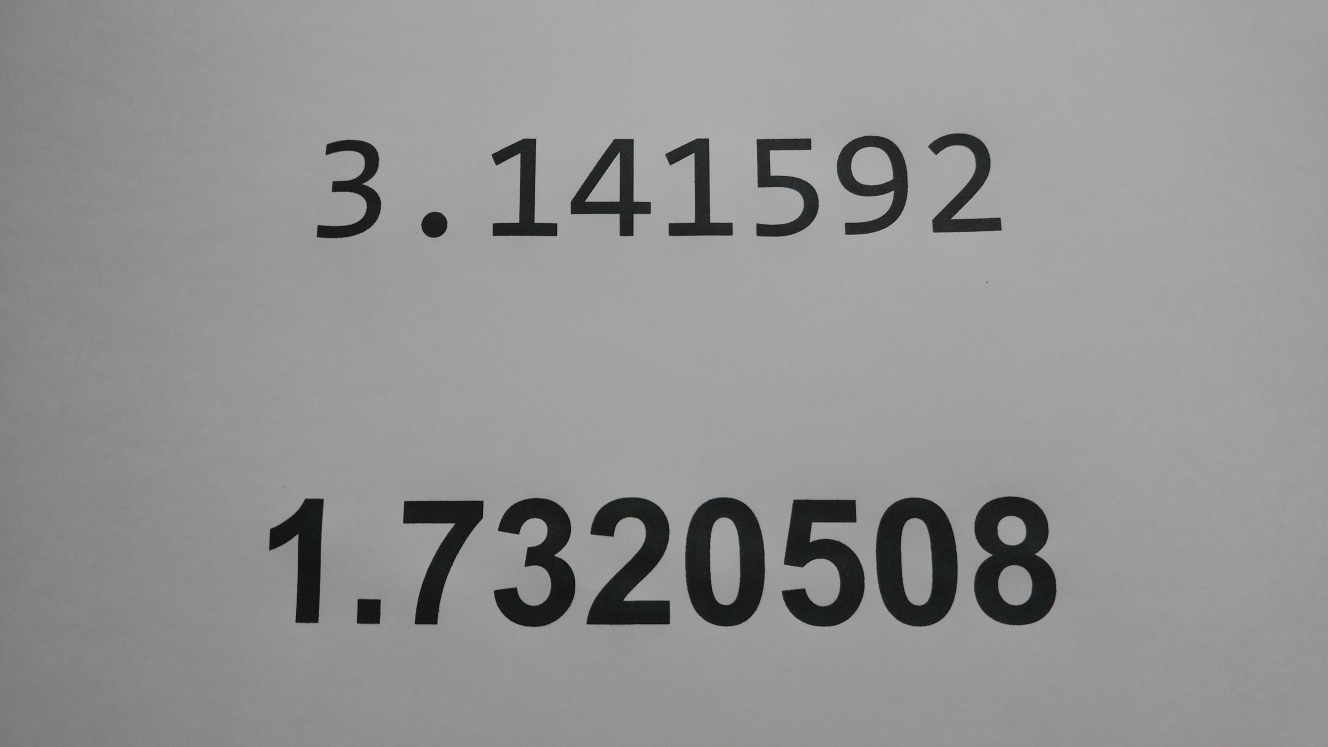

In [3]:
Image.fromarray(src)

In [5]:
# load digits 함수 만들기
def load_digits():
    img_digits = []
    
    for i in range(10):
        filename = f'/Users/jungjihoon/Library/Mobile Documents/com~apple~CloudDocs/00_DataScience/민형기/digits/digit{i}.bmp'
        img_digits.append(cv2.imread(filename, cv2.IMREAD_GRAYSCALE))
        
        if img_digits[i] is None:
            return None
        
    return img_digits

In [6]:
# find digits 함수 만들기
def find_digit(img, img_digits):
    max_dix = -1
    max_ccoeff = -1
    
    #최대 ncc 찾기
    for i in range(10):
        img = cv2.resize(img, (100, 150))
        res = cv2.matchTemplate(img, img_digits[i], cv2.TM_CCOEFF_NORMED)
        
        if res[0, 0] > max_ccoeff:
            max_idx = i
            max_ccoeff = res[0, 0]
            
    return max_idx

In [7]:
img_digits = load_digits() # 100x150 숫자 영상 불러오기 list of ndarray

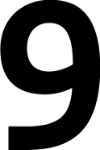

In [18]:
Image.fromarray((img_digits[-1]))

In [29]:
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_, src_bin = cv2.threshold(src_gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
cnt, _, stats, _ = cv2.connectedComponentsWithStats(src_bin)

In [32]:
cnt

18

In [44]:
stats

array([[     0,      0,   1328,    747, 928283],
       [   928,    133,     74,     99,   2663],
       [   837,    136,     71,     99,   3097],
       [   492,    139,     65,     97,   2462],
       [   571,    139,     80,     97,   2957],
       [   665,    138,     68,     98,   2400],
       [   756,    139,     63,     98,   2604],
       [   317,    140,     64,     98,   2445],
       [   421,    212,     26,     26,    526],
       [   586,    497,     84,    128,   5766],
       [   685,    497,     80,    129,   6305],
       [   974,    496,     83,    129,   6692],
       [   269,    499,     55,    124,   3500],
       [   494,    498,     81,    129,   5322],
       [   876,    498,     82,    129,   6431],
       [   403,    501,     81,    124,   4026],
       [   782,    500,     83,    127,   5956],
       [   357,    599,     24,     25,    581]], dtype=int32)

In [52]:
# 숫자 인식 결과 영상 생성
dst = src.copy()
for i in range(1, cnt):
    (x, y, w, h, s) = stats[i]
    
    if s < 1000:
        continue
        
    # 가장 유사한 이미지 선택
    digit = find_digit(src_gray[y:y+h, x:x+w], img_digits)
    cv2.rectangle(dst, (x,y,w,h), (0,255,255))
    cv2.putText(dst, str(digit), (x, y-4), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,255), 2, cv2.LINE_AA)    

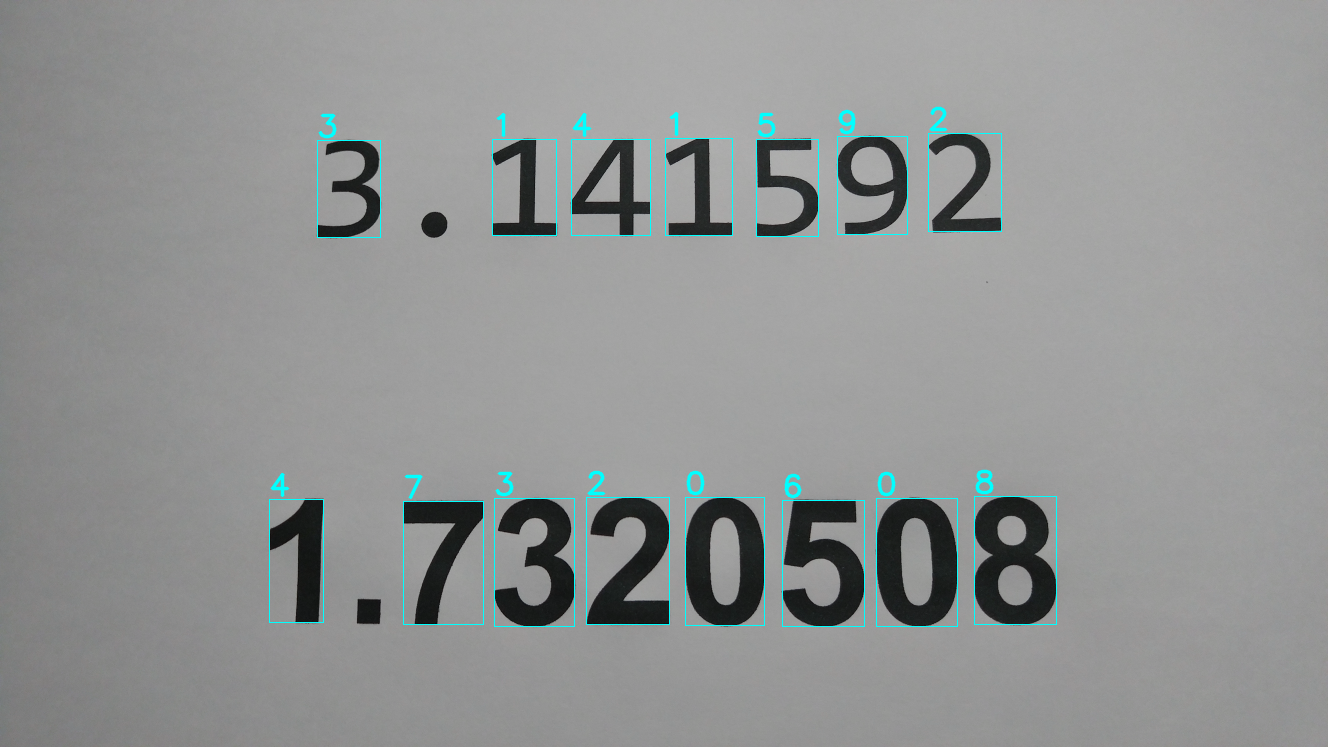

In [53]:
Image.fromarray(dst)